In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [ ]:
air = pd.read_csv("EastWestAirlines.xlsx.csv")
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
air.rename(columns={'ID#':'ID','Award?':'Award'},inplace = True)

air

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [ ]:
air.set_index('ID',inplace=True)
air

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [ ]:
air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [ ]:
air.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [ ]:
air.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [ ]:
air.duplicated().sum()

1

In [ ]:
air[air.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
3899,1000,0,1,1,1,0,0,0,0,1597,0


In [ ]:
air.drop_duplicates(inplace = True)


In [ ]:
air

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [ ]:
x = air.iloc[:,2:]
x

,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,
1,1,1,1,174,1,0,0,7000,0
2,1,1,1,215,2,0,0,6968,0
3,1,1,1,4123,4,0,0,7034,0
4,1,1,1,500,1,0,0,6952,0
5,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...
4017,1,1,1,8525,4,200,1,1403,1
4018,1,1,1,981,5,0,0,1395,1
4019,3,1,1,25447,8,0,0,1402,1


In [ ]:
air.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.998000e+03,3998.000000,3998.00000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,7.361949e+04,144.150575,2.05978,1.014507,1.012256,17149.134567,11.604802,460.170835,1.373937,4119.190095,0.370435
std,1.007817e+05,773.757220,1.37699,0.147669,0.195265,24152.465996,9.603258,1400.365407,3.793585,2065.007629,0.482982
min,0.000000e+00,0.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,1.853425e+04,0.000000,1.00000,1.000000,1.000000,1250.000000,3.000000,0.000000,0.000000,2331.250000,0.000000
50%,4.313800e+04,0.000000,1.00000,1.000000,1.000000,7183.000000,12.000000,0.000000,0.000000,4097.500000,0.000000
75%,9.240500e+04,0.000000,3.00000,1.000000,1.000000,23810.750000,17.000000,313.500000,1.000000,5790.750000,1.000000
max,1.704838e+06,11148.000000,5.00000,3.000000,5.000000,263685.000000,86.000000,30817.000000,53.000000,8296.000000,1.000000


<Axes: >

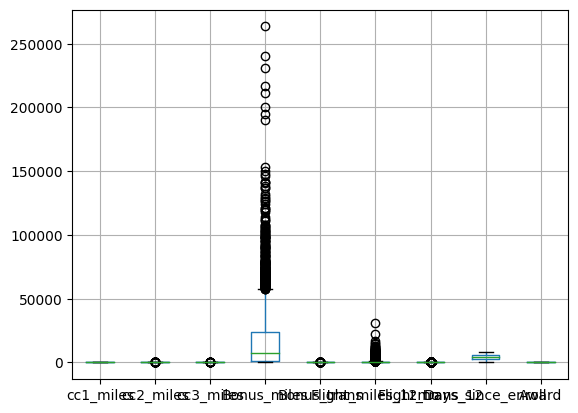

In [ ]:
x.boxplot() # check for outliers

In [ ]:
# Feature Scaling
sc = StandardScaler()
x = sc.fit_transform(x)
print(x)

[[-0.76973166 -0.09825429 -0.06277446 ... -0.3622191   1.39523468
  -0.76707163]
 [-0.76973166 -0.09825429 -0.06277446 ... -0.3622191   1.37973643
  -0.76707163]
 [-0.76973166 -0.09825429 -0.06277446 ... -0.3622191   1.41170157
  -0.76707163]
 ...
 [ 0.68289387 -0.09825429 -0.06277446 ... -0.3622191  -1.31599028
   1.30365921]
 [-0.76973166 -0.09825429 -0.06277446 ... -0.09858321 -1.3164746
  -0.76707163]
 [-0.76973166 -0.09825429 -0.06277446 ... -0.3622191  -1.31792757
  -0.76707163]]


In [ ]:
# MODEL BUILDING OF DBSCAN
db1 = DBSCAN()  # default eps=0.5, min_samples=5
db1.fit_predict(x) # we get lebels for clusters, -1: outlier, only 1 cluster is made i.e. cluster 0

array([0, 0, 0, ..., 6, 0, 0])

In [ ]:
db2 = DBSCAN(eps=1,min_samples=3) # try changing eps and min_samples
db2.fit_predict(x) # less data points are considered as outliers now.

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
db3 = DBSCAN(eps=1,min_samples=7)
db3.fit_predict(x)

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
air.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

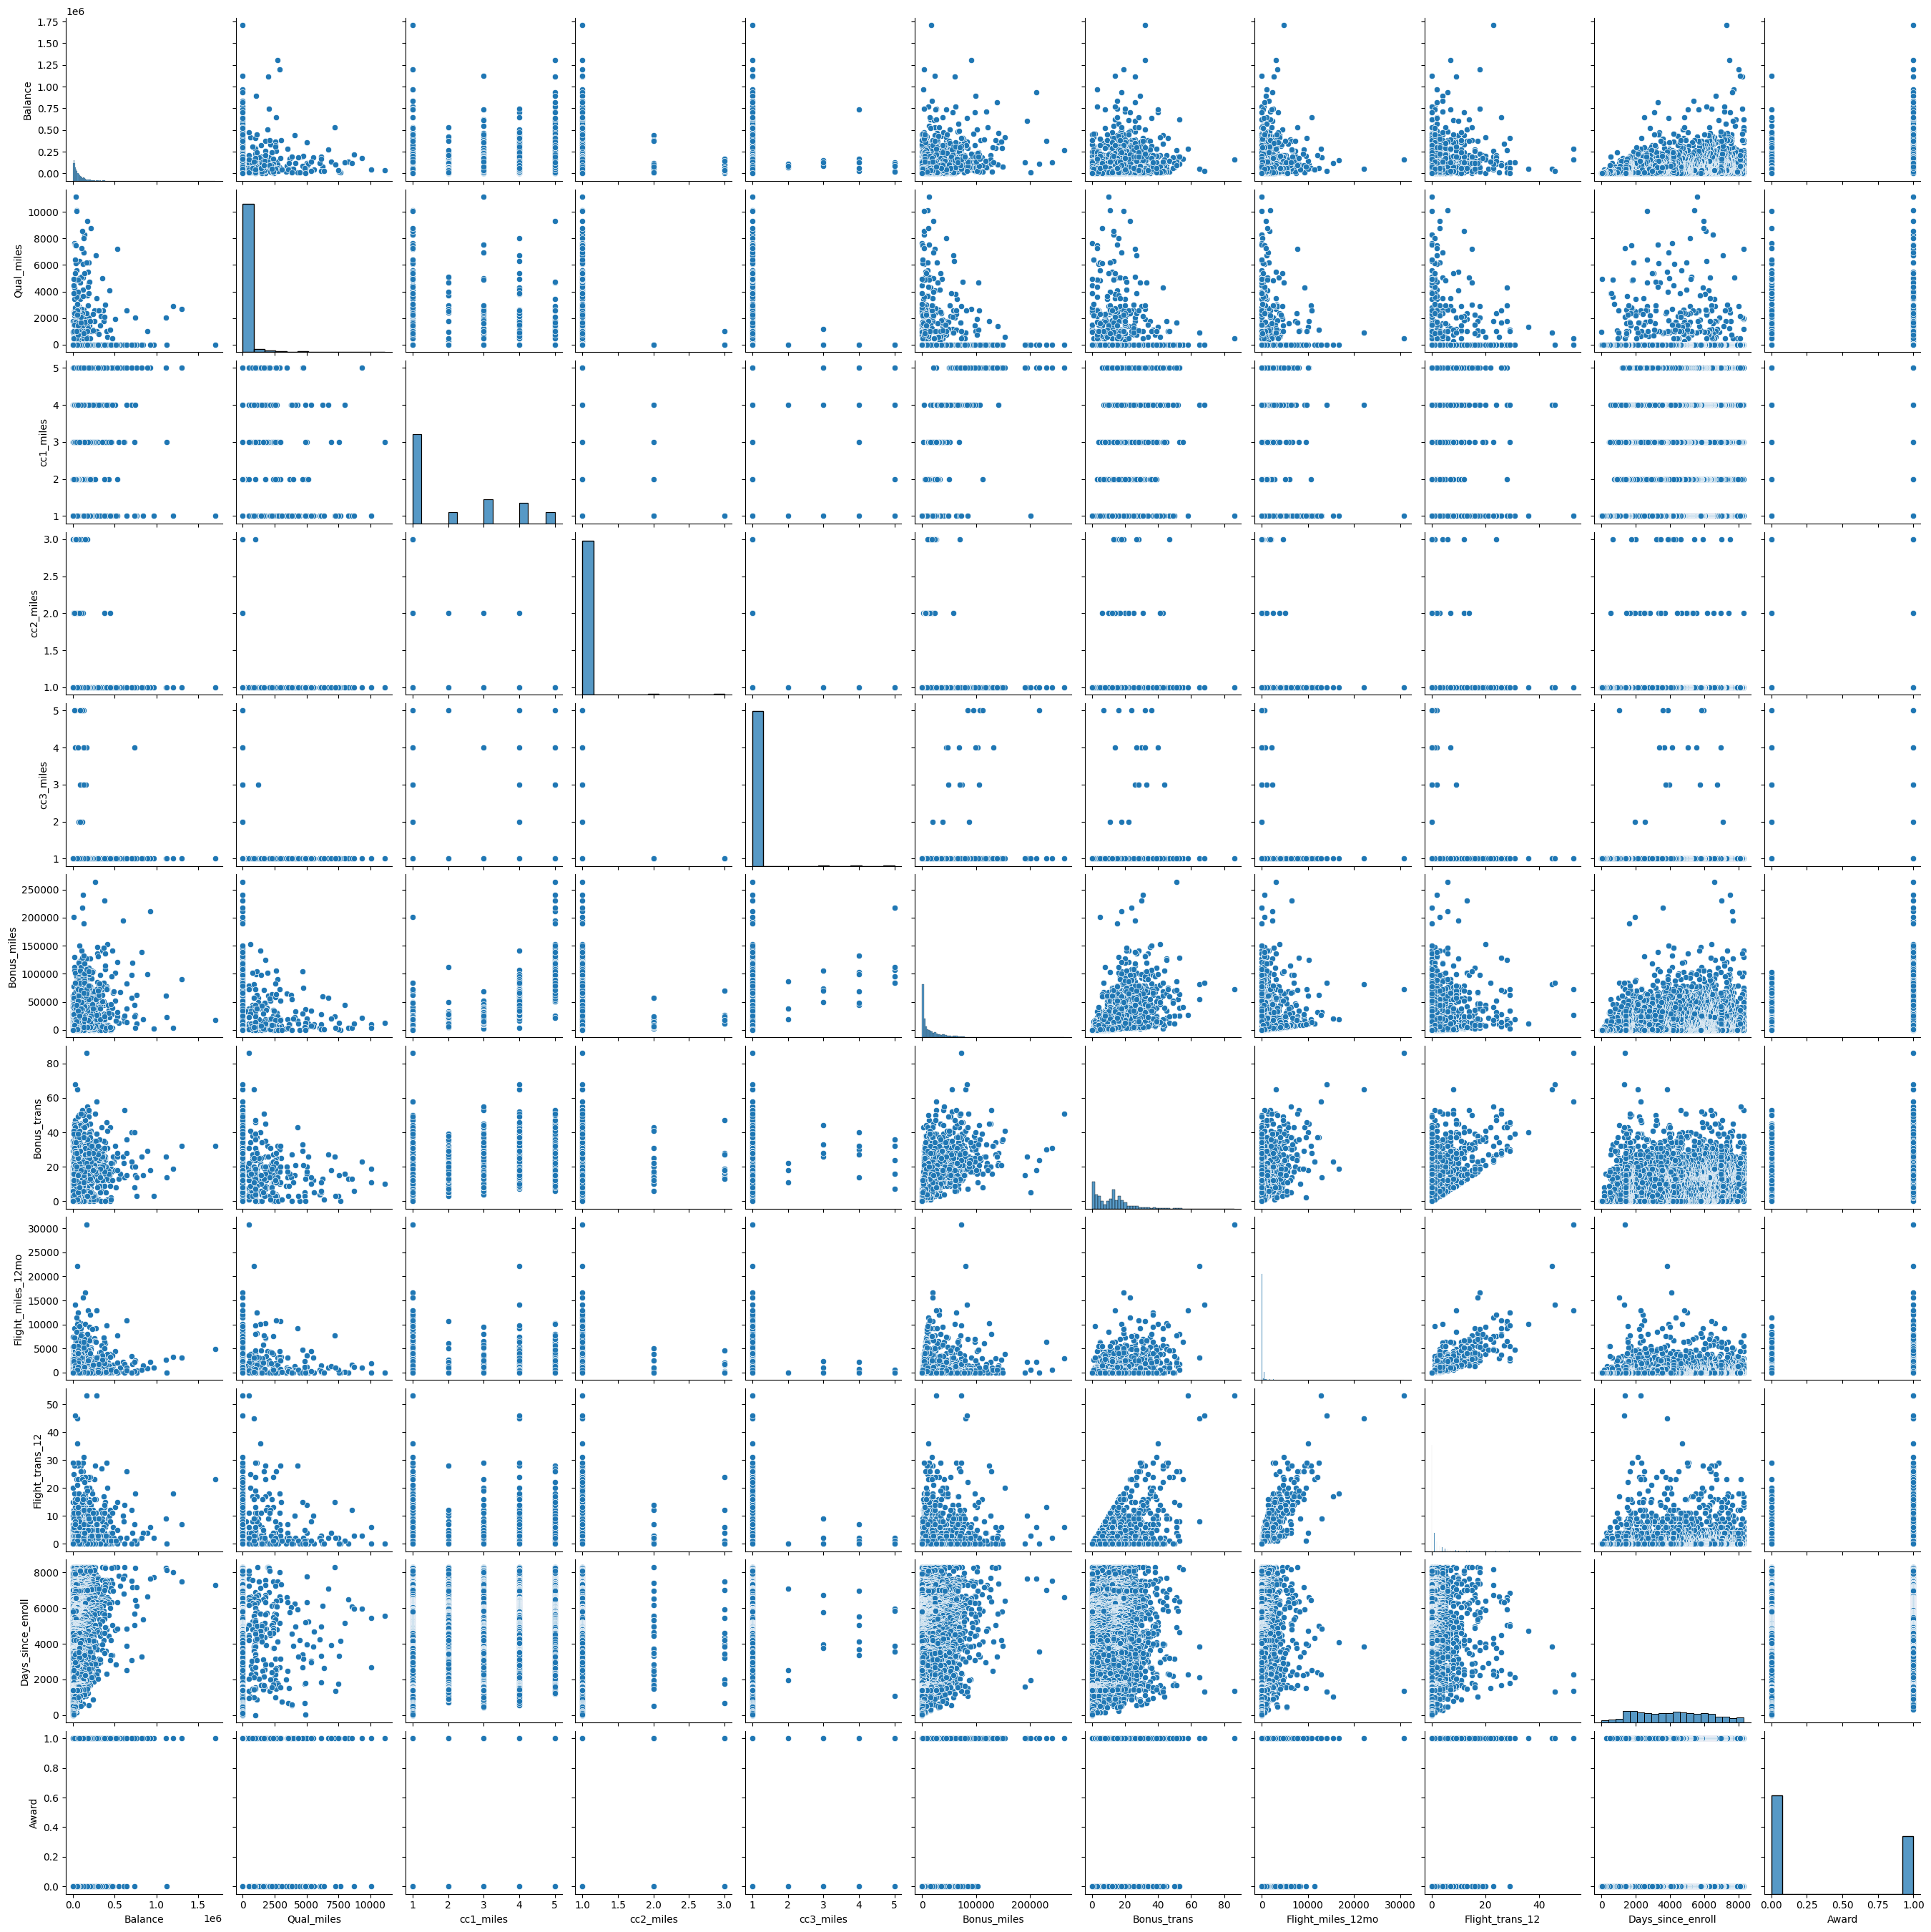

In [ ]:
sns.pairplot(air) #DBSCAN creates cluster by density. so same is shown in diag. below. 1 cluster with outliers
# ideally looking at these datapoints only 1 cluster should be there so we got 1 cluster as cluster 0.

In [ ]:
# evaluate cluster with Silhouette Score
silhouette_score(x,db2.fit_predict(x))# pass entire dataset with labels, got moderate cluster

0.17332678125770032

In [ ]:
# Try changing values again
db4 = DBSCAN(eps=2,min_samples=3) # try changing eps and min_samples
y = db4.fit_predict(x)

In [ ]:
# evaluate cluster with Silhouette Score
silhouette_score(x,db4.fit_predict(x)) # good score for eps=2,min_sample=3, So try changing these values for good score

0.2906515496273135

In [ ]:
silhouette_score(x,db3.fit_predict(x))

0.2783850492007368

In [ ]:
silhouette_score(x,db1.fit_predict(x))

0.00431296387336529

In [ ]:
air['Cluster'] = y
air

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,Cluster
ID,,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0,0
2,19244,0,1,1,1,215,2,0,0,6968,0,0
3,41354,0,1,1,1,4123,4,0,0,7034,0,0
4,14776,0,1,1,1,500,1,0,0,6952,0,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
4018,64385,0,1,1,1,981,5,0,0,1395,1,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1,1


In [ ]:
air = air.reset_index(drop)

NameError: name 'drop' is not defined